C:\Users\tsuchida\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\tsuchida\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\tsuchida\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


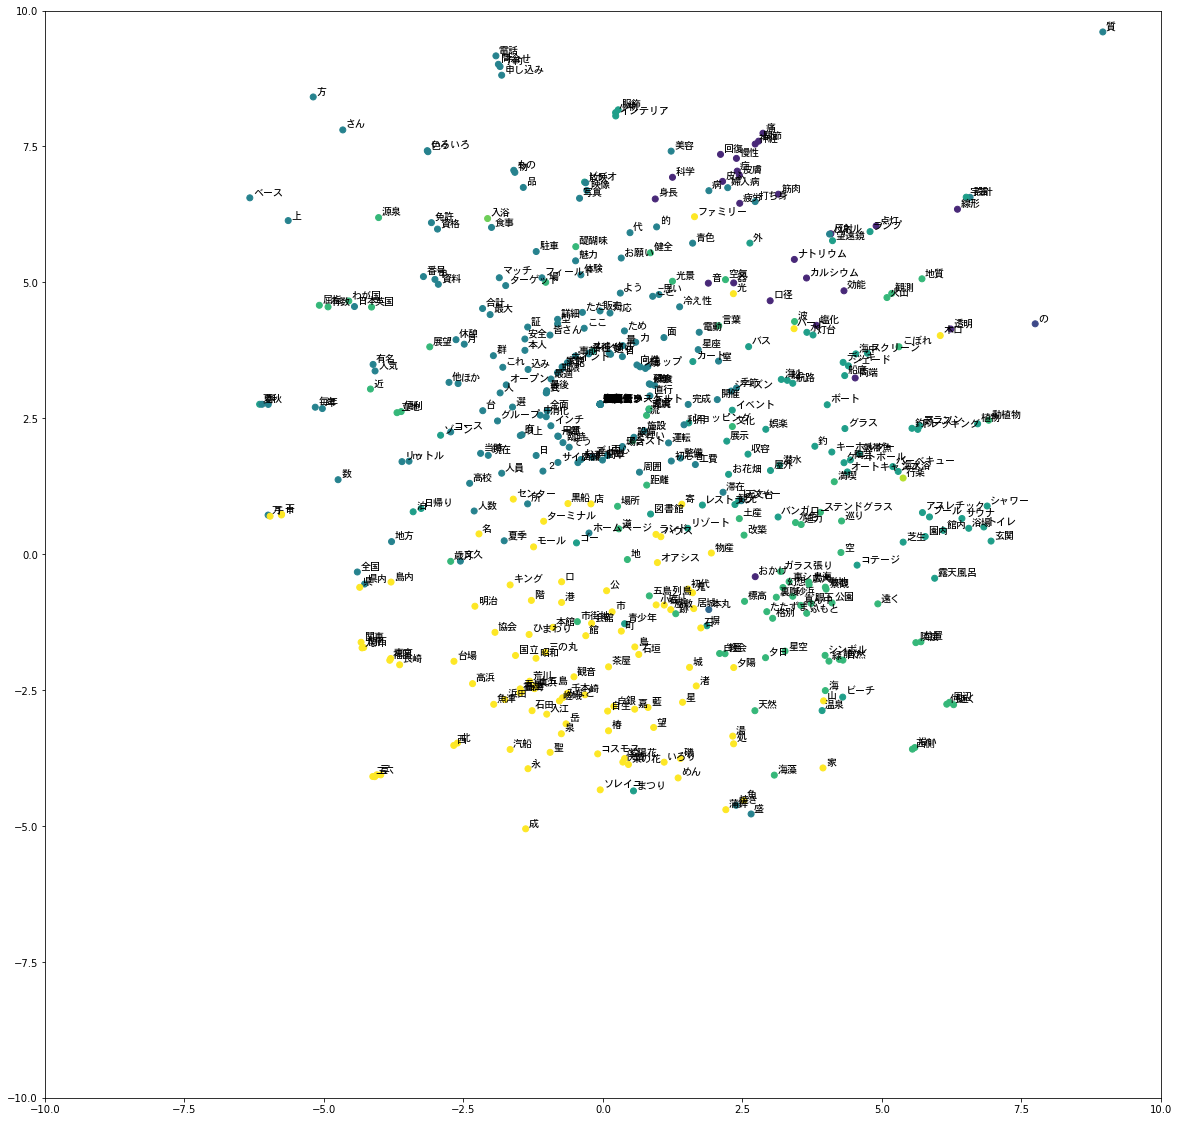

In [38]:
#AI-TECHGYM-1-14-A-2
#自然言語処理

#インポート
import numpy as np
import pandas as pd
import os

os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_1\Answer_sheet\AI_Chapter1_saved_files")

#主成分分析
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

#グラフ
from matplotlib import pylab as plt
import matplotlib.font_manager as font_manager

# word2vec データ読み込み
from gensim.models import KeyedVectors

#フォントの準備
import urllib.request as req
url = "https://github.com/hokuto-HIRANO/Word2Vec/raw/master/font/Osaka.ttc"
req.urlretrieve(url, "./Osaka.ttc")

#フォント指定
FONTPATH='./Osaka.ttc'
prop = font_manager.FontProperties(fname=FONTPATH)

#グラフサイズ
plt.figure(figsize=(20,20))

# ダウンロード先のパスを指定
MODEL_FILENAME = "./stanby-jobs-200d-word2vector.bin"
w2v = KeyedVectors.load_word2vec_format(MODEL_FILENAME, binary=True)

# データの読み込み
df = pd.read_csv("words.csv") 

#ベクトルの取得
vectors = []
zero_vec = np.zeros(200)

for w in df["words"].values:
    try:
        vectors.append(w2v[w])
    except Exception as e:
        vectors.append(zero_vec)

#PCA
tsne = TSNE(n_components=2)
V = tsne.fit_transform(vectors)
df_V = pd.DataFrame(V)

# クラスタリング
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit(vectors)
df_V['cluster'] = pd.Series(clusters.labels_, index=df_V.index)

#色指定
color = df_V.cluster.astype(np.float)

#ベクトルを平面にプロット
plt.scatter(V[:, 0], V[:,1],c=color)

#文字のプロット
for w, x, y in zip(df["words"].values, V[:,0], V[:,1]):
    plt.annotate(w, xy=(x, y), xytext=(3,3), textcoords='offset points', fontproperties=prop, fontsize=10)

plt.xlim(-10,10)
plt.ylim(-10,10)

#グラフ表示
plt.show()


In [36]:
print(set(color))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}


In [39]:
model.wv.n_similarity('老人', '海')

KeyError: "Key '老' not present"

In [34]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [89]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data[:,0].reshape(-1,1))
print(X_std[:5])

[[ 1.09706398]
 [ 1.82982061]
 [ 1.57988811]
 [-0.76890929]
 [ 1.75029663]]


In [90]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)
print(X_std[:5])

[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.81189987e-01]
 [ 1.5

In [49]:
#AI-TECHGYM-1-4-A-3
#教師なし学習 k-mean法

# データ加工・処理・分析ライブラリ
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データがあるurl の指定
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

# データを取得して展開する
#対象データを読み込み
shoppers= pd.read_csv(file_url)

# データの列の絞り込み
shoppers_sub = shoppers[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','Region','SpecialDay']]

# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# クラスターの重心を計算
kmeans.fit(shoppers_sub)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# 金融機関のデータにクラスター番号のデータを結合
shoppers_with_cluster = pd.concat([shoppers, labels], axis=1)

# 分割のための区切りを設定
bins = [0,0.2,0.4,0.6,0.8,1]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_sp = pd.cut(shoppers_with_cluster.SpecialDay, bins, right=False)

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_sp], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_sp = df.groupby(['cluster_number', 'SpecialDay']).size().unstack().fillna(0)
display(cross_cluster_sp)

# 分割のための区切りを設定
bins_2 = [1,2,3,4,5,6,7,8,9]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_r = pd.cut(shoppers_with_cluster.Region, bins_2, right=False, labels=[1,2,3,4,5,6,7,8])

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_r], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_r = df.groupby(['cluster_number', 'Region']).size().unstack().fillna(0)
display(cross_cluster_r)


SpecialDay,"[0.0, 0.2)","[0.2, 0.4)","[0.4, 0.6)","[0.6, 0.8)","[0.8, 1.0)"
cluster_number,,,,,
0,386,6,7,2,15
1,10,0,0,0,0
2,1096,9,28,26,20
3,2807,49,48,83,71
4,6657,114,159,240,218
5,123,0,1,0,1


Region,1,2,3,4,5,6,7,8
cluster_number,,,,,,,,
0,181,39,83,35,12,25,17,15
1,8,0,1,1,0,0,0,0
2,464,119,239,110,27,64,78,39
3,1145,302,616,302,79,212,207,120
4,2912,667,1444,727,196,500,453,260
5,70,9,20,7,4,4,6,0
